In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns

In [2]:
data = pd.read_csv("sample.csv")
data = data.drop(["Unnamed: 0"], axis=1)
data

,stars_review,useful,funny,cool,text,date,name,address,city,state,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,5.0,0,0,0,"Incredible Food, staff, and atmosphere. I woul...",2020-07-24 04:07:52,Cafe La Maude,816 N 4th St,Philadelphia,PA,...,0,0,0,0,0,0,0,0,0,0
1,4.0,0,0,0,Low key but best of what Old City had to offer...,2016-02-11 01:08:17,Marmont Steakhouse & Bar,222 Market St,Philadelphia,PA,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0,0,0,You can tell when you walk in by the attention...,2017-01-29 00:33:18,La Mula Terca,2053 S Beechwood St,Philadelphia,PA,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2,1,2,Big fat chicken wings with a crunch with a mea...,2010-01-03 07:49:43,Café Soho,468 W Cheltenham Ave,Philadelphia,PA,...,3,0,0,0,9,9,6,6,2,3
4,3.0,2,0,2,I came here for dinner for the seasonally rota...,2014-12-29 17:19:13,Russet,1521 Spruce St,Philadelphia,PA,...,3,3,0,5,31,53,53,53,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,3.0,1,0,0,If you looking for an above average dive bar t...,2018-02-07 20:26:33,The Bayou Bar & Grill,4245 Main St,Philadelphia,PA,...,1,1,0,0,27,57,32,32,12,6
1496,4.0,1,0,0,OMG all I can say is they have the beat hoagie...,2014-05-01 20:52:36,The Fresh Grocer of Walnut,4001 Walnut St,Philadelphia,PA,...,0,0,0,0,0,0,0,0,0,0
1497,1.0,0,3,1,Did not even have a chance to eat brunch here....,2019-10-20 16:11:00,Valanni,1229 Spruce St,Philadelphia,PA,...,0,0,1,0,0,0,0,0,0,0
1498,5.0,4,1,2,Whipped Bakeshop is a friendly neighborhood co...,2021-03-08 12:03:19,Whipped Bakeshop,636 Belgrade St,Philadelphia,PA,...,2,1,0,0,63,46,60,60,16,32


In [3]:
graph_data = {}
for row in tqdm(data["categories"]):
    if not pd.notna(row):
        continue
    categories = row.split(",")
    for category in categories:
        category = category.strip()
        if category not in graph_data:
            graph_data[category] = 0
        graph_data[category] += 1

  0%|          | 0/1500 [00:00<?, ?it/s]

(array([51., 50., 50., 50., 50., 51., 50., 50., 50., 51.]),
 array([  0. ,  50.2, 100.4, 150.6, 200.8, 251. , 301.2, 351.4, 401.6,
        451.8, 502. ]),
 <BarContainer object of 10 artists>)

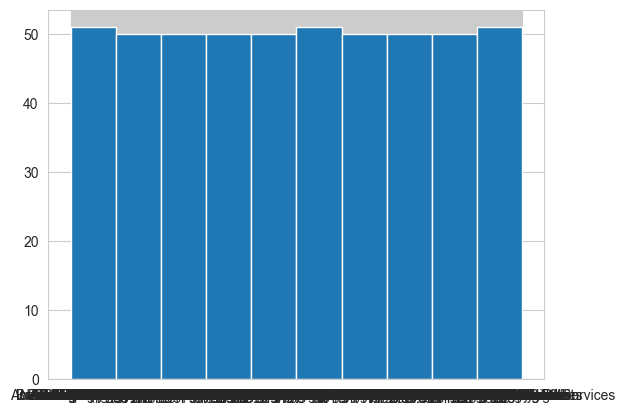

In [4]:
plt.hist(graph_data)

In [5]:
list = [(k, v) for k, v in graph_data.items()]

In [6]:
list.sort(key= lambda x: x[1], reverse=True)
list

[('Restaurants', 1056),
 ('Food', 428),
 ('Nightlife', 364),
 ('Bars', 342),
 ('American (New)', 230),
 ('Breakfast & Brunch', 199),
 ('Sandwiches', 168),
 ('American (Traditional)', 158),
 ('Coffee & Tea', 127),
 ('Italian', 124),
 ('Pizza', 112),
 ('Shopping', 111),
 ('Event Planning & Services', 98),
 ('Specialty Food', 87),
 ('Beauty & Spas', 84),
 ('Chinese', 82),
 ('Seafood', 80),
 ('Desserts', 74),
 ('Mexican', 72),
 ('Cocktail Bars', 69),
 ('Pubs', 68),
 ('Gastropubs', 62),
 ('Bakeries', 62),
 ('Beer', 59),
 ('Wine & Spirits', 59),
 ('Japanese', 58),
 ('Asian Fusion', 57),
 ('Cheesesteaks', 57),
 ('Cafes', 54),
 ('Vegetarian', 54),
 ('Burgers', 54),
 ('Arts & Entertainment', 53),
 ('Lounges', 52),
 ('Mediterranean', 50),
 ('Hotels & Travel', 50),
 ('Wine Bars', 45),
 ('Sushi Bars', 44),
 ('Diners', 42),
 ('Delis', 42),
 ('Home Services', 42),
 ('Hair Salons', 41),
 ('Caterers', 40),
 ('Local Flavor', 40),
 ('Venues & Event Spaces', 39),
 ('Active Life', 38),
 ('Comfort Food', 3

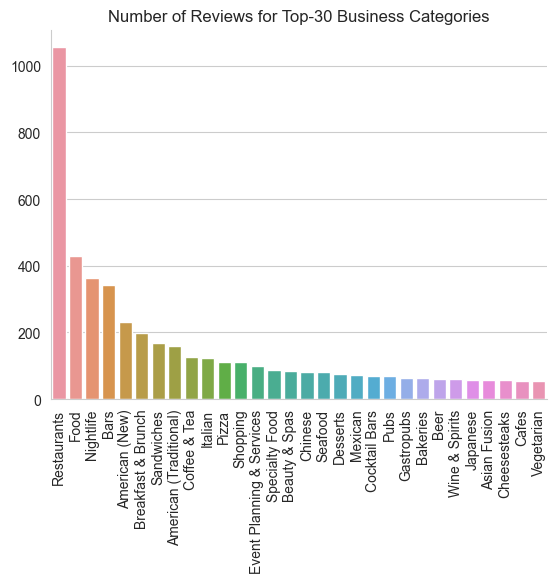

In [7]:
count = 30
x = [x[0] for x in list[:count]]
y = [y[1] for y in list[:count]]
sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
plt.title("Number of Reviews for Top-30 Business Categories")
sns.despine()
plt.show()